# Objective
You are provided with a dataset of images of plant seedlings at various stages of grown. Each image has a filename that is its unique id. The dataset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a plant's species from a photo.

# Data Description
The data file names are:
- images.npy
- Label.csv

The original files are from Kaggle. Due to the large volume of data, the images were converted to images.npy file and the labels are also put into the Labels.csv.

In [1]:
PYTHONHASHSEED=0 

import numpy as np
import pandas as pd
import random
random.seed(2)
np.random.seed(597)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(106)

from sklearn.model_selection import train_test_split
import cv2
from sklearn.metrics import classification_report

# Import Data

In [2]:
plant = np.load("images.npy")  # import images

In [3]:
X = plant.copy()

In [4]:
X.shape

(4750, 128, 128, 3)

- The image numpy array contains 4750 images, each image is 128 x 128 x 3.

In [39]:
X[3]   # check a random image

array([[[ 49,  48,  57],
        [ 47,  48,  58],
        [ 48,  50,  56],
        ...,
        [ 48,  47,  54],
        [ 73,  69,  82],
        [ 73,  72,  82]],

       [[ 48,  49,  59],
        [ 48,  54,  58],
        [ 72,  70,  75],
        ...,
        [ 46,  48,  54],
        [ 63,  64,  67],
        [ 69,  66,  75]],

       [[ 48,  49,  60],
        [ 60,  65,  67],
        [100, 102, 106],
        ...,
        [ 36,  39,  47],
        [ 43,  44,  52],
        [ 72,  69,  80]],

       ...,

       [[ 59,  55,  60],
        [ 60,  57,  61],
        [ 62,  59,  61],
        ...,
        [ 38,  68,  86],
        [ 50,  73,  91],
        [ 39,  60,  81]],

       [[138, 135, 138],
        [169, 166, 160],
        [173, 166, 163],
        ...,
        [ 36,  58,  77],
        [ 37,  57,  83],
        [ 30,  51,  73]],

       [[121, 115, 120],
        [145, 141, 143],
        [140, 133, 135],
        ...,
        [ 33,  56,  62],
        [ 64,  80,  87],
        [ 53,  74,  85]]

In [5]:
labels = pd.read_csv("Labels.csv")    # import labels

In [6]:
y = labels.copy()

In [7]:
y.shape

(4750, 1)

In [48]:
y.sample(5)

,Label
2928,Scentless Mayweed
4396,Loose Silky-bent
1112,Shepherds Purse
653,Fat Hen
4656,Loose Silky-bent


In [41]:
y["Label"].value_counts()

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: Label, dtype: int64

In [9]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4750 non-null   object
dtypes: object(1)
memory usage: 37.2+ KB


- The length of labels is 4750. The datatype of label is object. As the problem statement indicates, there're 12 unique classes.
- The distribution of classes is not uniform, `Loose Silky-bent` with the maximum of 654 and `Maize` with the minimum of 221.

# EDA

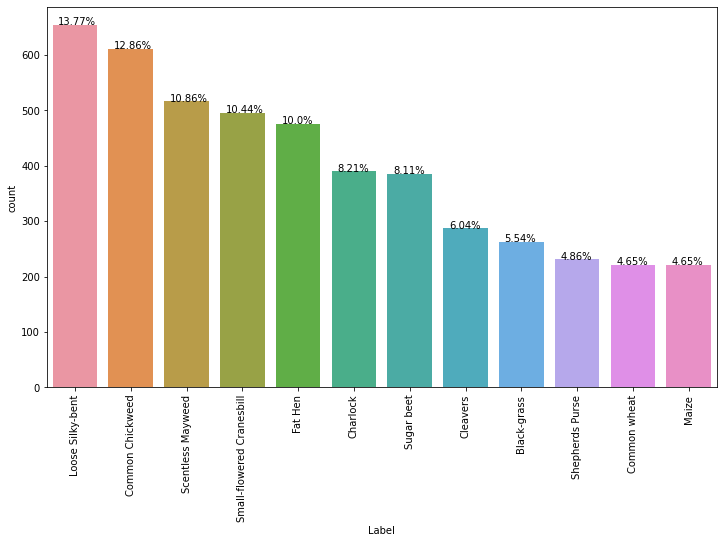

In [37]:
plt.figure(figsize = (12,7))
ax = sns.countplot(x = "Label", data = y, order =y["Label"].value_counts().index);    # countplot of labels
plt.xticks(rotation = 90);
for p in ax.patches:
    per = np.round(100 * p.get_height() / y.shape[0], 2)
    plt.annotate(str(per) + "%", (p.get_x() + p.get_width()/2 - 0.3, p.get_y() + p.get_height() + 0.1))

- `Loose Silky-bent` accounts for 13.77% of the total, followed by `Common Chickweed` of 12.86%.

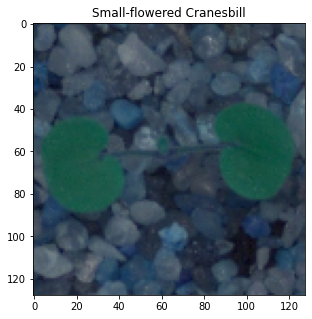

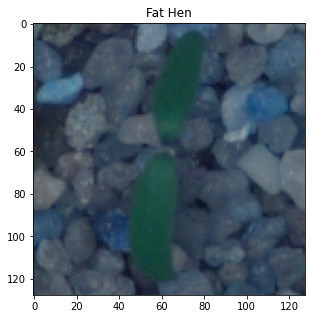

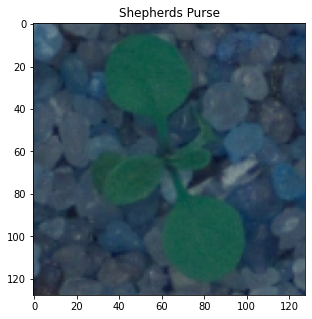

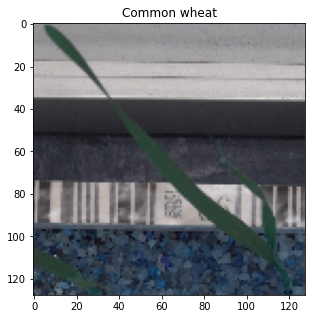

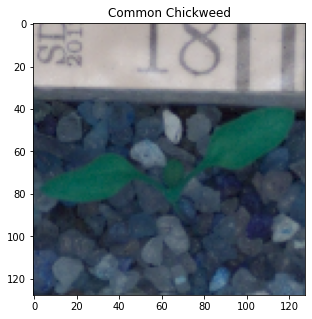

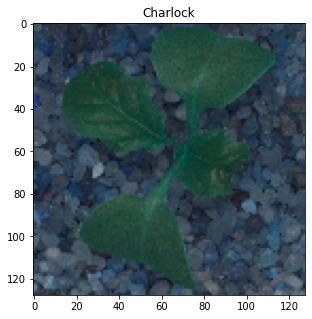

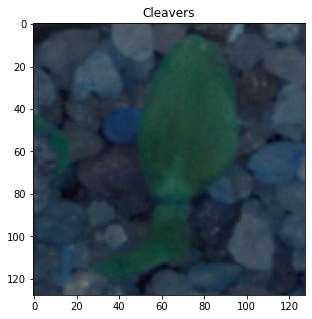

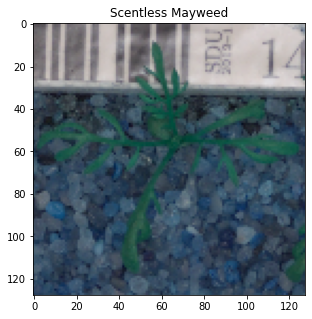

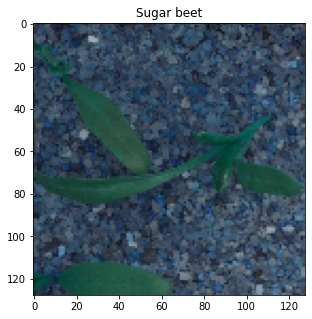

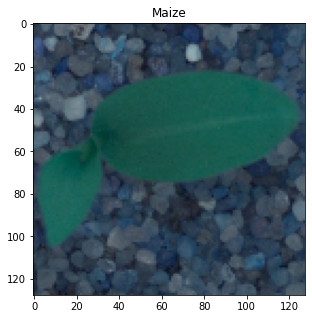

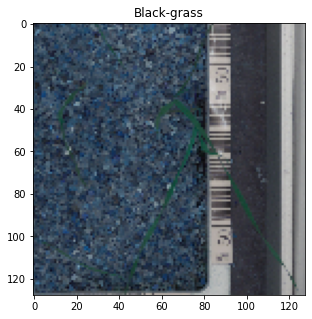

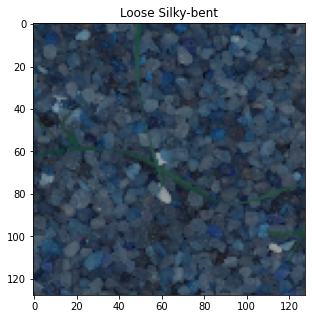

In [54]:
# Plot the images from each class and print their corresponding labels
for label in y["Label"].unique():
    first_idx = y[y.Label == label].index[0] # the index corresponding to the 1st image of each class
    plt.figure(figsize=(5,5))
    plt.imshow(X[first_idx]);
    plt.title(label);

- The images are colored. Width and height are both 128, with 3 channels.

# Data Pre-processing

In [ ]:
# Gaussian Blurring